<a href="https://colab.research.google.com/github/yinanazhou/rum-analysis/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", 
              palette="Paired")
sns.set_style({"grid.color": ".8", "grid.linestyle": "--"})

In [2]:
from google.colab import drive

drive.mount('/content/drive/')
%cd 'drive/My Drive/Rhum/'

Mounted at /content/drive/
/content/drive/My Drive/Rhum


In [3]:
%pwd

'/content/drive/My Drive/Rhum'

# read and preprocess data

In [ ]:
df = pd.read_csv('./dataset.csv', na_values=["Unknown", "Best Price"])

In [ ]:
# preview data
df.head()

,URL,Name:,Company:,Type:,Distillation:,ABV:,Location,Score,nRatings,Price,Aged:,Distilled:
0,https://rumratings.com/rum/316-diplomatico-res...,Reserva Exclusiva,Diplomatico,Aged,Pot Still,40.0%,Venezuela,7.9,2802,44.99,NaN,NaN
1,https://rumratings.com/rum/853-ron-zacapa-23-s...,23 Solera,Ron Zacapa,Aged,Column Still (1-4),40.0%,Guatemala,7.5,2188,53.99,NaN,NaN
2,https://rumratings.com/rum/482-kraken-black-sp...,Black Spiced,Kraken,Spiced,Column Still (1-4),40.0%,Trinidad and Tobago,6.0,1731,29.99,NaN,NaN
3,https://rumratings.com/rum/654-plantation-xo-2...,XO 20th Anniversary,Plantation,Aged,Pot and Column Still,40.0%,Multiple,8.4,1697,49.99,NaN,NaN
4,https://rumratings.com/rum/367-el-dorado-12-year,12-Year,El Dorado,Aged,Pot and Column Still,40.0%,Guyana,7.6,1341,40.99,12.0,NaN


In [ ]:
# rename column names and remove first col
df = df.iloc[:, 1:]
df = df.rename(columns={'Name:': 'Name', 
                        'Company:': 'Company', 
                        'Type:': 'Type', 
                        'Distillation:': 'Distillation', 
                        'ABV:': 'ABV', 
                        'Aged:': 'Aged',
                        'Distilled:': 'Distilled'})

In [ ]:
# sort by number of ratings
df = df.replace('1 rating', 1)
df["nRatings"] = pd.to_numeric(df["nRatings"])
df = df.sort_values(by=['nRatings'], ascending=False)

In [ ]:
df.head()

,Name,Company,Type,Distillation,ABV,Location,Score,nRatings,Price,Aged,Distilled
0,Reserva Exclusiva,Diplomatico,Aged,Pot Still,40.0%,Venezuela,7.9,2802.0,44.99,NaN,NaN
1,23 Solera,Ron Zacapa,Aged,Column Still (1-4),40.0%,Guatemala,7.5,2188.0,53.99,NaN,NaN
2,Black Spiced,Kraken,Spiced,Column Still (1-4),40.0%,Trinidad and Tobago,6.0,1731.0,29.99,NaN,NaN
3,XO 20th Anniversary,Plantation,Aged,Pot and Column Still,40.0%,Multiple,8.4,1697.0,49.99,NaN,NaN
4,12-Year,El Dorado,Aged,Pot and Column Still,40.0%,Guyana,7.6,1341.0,40.99,12.0,NaN


In [ ]:
# peek at last 5 rows
df.tail(5)

,Name,Company,Type,Distillation,ABV,Location,Score,nRatings,Price,Aged,Distilled
9275,Blanco,Gran Peñuela,Light,NaN,40.0%,Mexico,NaN,NaN,NaN,NaN,NaN
9276,1998 Extra Rare 20-Year,Reimonenq,Agricole,Column Still (1-4),47.0%,Guadeloupe,NaN,NaN,NaN,20.0,1998.0
9277,Rhum Vieux BIO,Neisson,Agricole,Column Still (1-4),52.3%,Martinique,NaN,NaN,NaN,NaN,NaN
9278,Espresso Cream,RumJava,Flavored,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN
9279,2017 Blanc Cannonball,Montebello,Agricole,Column Still (1-4),59.0%,Guadeloupe,NaN,NaN,NaN,NaN,2017.0


In [ ]:
# drop the rums that have no ratings
df = df.drop(df[pd.isna(df.nRatings)].index)

In [ ]:
# peek at last 5 rows
df.tail(5)

,Name,Company,Type,Distillation,ABV,Location,Score,nRatings,Price,Aged,Distilled
5910,Mermaid With a Flamethrower 14-Year,Rolling Fork Spirits,Flavored,Pot Still,56.9%,United States,8.0,1.0,NaN,14.0,NaN
5911,Dark,Nuka,Dark,NaN,NaN,United States,5.0,1.0,NaN,NaN,NaN
5912,Brazil 2013/2017 Oloroso Cask Finish 3-Year,S.B.S.,Aged,Pot Still,45.0%,Denmark,6.0,1.0,NaN,3.0,NaN
5913,Reserva 8-Year,Hell Or High Water,Aged,Pot and Column Still,40.0%,Finland,6.0,1.0,NaN,8.0,NaN
7602,Carta Real Dorado,Dupuy Barceló,Gold,NaN,NaN,Dominican Republic,4.0,1.0,NaN,NaN,NaN


In [ ]:
df.head()

,Name,Company,Type,Distillation,ABV,Location,Score,nRatings,Price,Aged,Distilled
0,Reserva Exclusiva,Diplomatico,Aged,Pot Still,40.0%,Venezuela,7.9,2802.0,44.99,NaN,NaN
1,23 Solera,Ron Zacapa,Aged,Column Still (1-4),40.0%,Guatemala,7.5,2188.0,53.99,NaN,NaN
2,Black Spiced,Kraken,Spiced,Column Still (1-4),40.0%,Trinidad and Tobago,6.0,1731.0,29.99,NaN,NaN
3,XO 20th Anniversary,Plantation,Aged,Pot and Column Still,40.0%,Multiple,8.4,1697.0,49.99,NaN,NaN
4,12-Year,El Dorado,Aged,Pot and Column Still,40.0%,Guyana,7.6,1341.0,40.99,12.0,NaN


In [ ]:
# drop duplicates
df = df.drop_duplicates()

In [ ]:
df.shape

(5178, 11)

In [ ]:
# save csv file
df.to_csv('./preprocessed.csv', index=False)

# Analysis

In [4]:
# load data
df = pd.read_csv('./preprocessed.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5178 entries, 0 to 5177
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          5177 non-null   object 
 1   Company       5178 non-null   object 
 2   Type          5176 non-null   object 
 3   Distillation  1145 non-null   object 
 4   ABV           3886 non-null   object 
 5   Location      5178 non-null   object 
 6   Score         5178 non-null   float64
 7   nRatings      5178 non-null   float64
 8   Price         139 non-null    float64
 9   Aged          2012 non-null   float64
 10  Distilled     1268 non-null   float64
dtypes: float64(5), object(6)
memory usage: 445.1+ KB


After preprocessing, 5178 rums have at least one rating. However, the website only provides 139 prices. Let's first have a look at the best rums rated. 

According to the explanation on the rum ratings website, the rating score is calculated by taking the average of ratings from the users with more than five ratings. However, it does not consider the number of ratings. If one rum has only one rating of 10, it will be rated as a 10, which is misleading. Let's first plot a heatmap for the average score and number of ratings. 

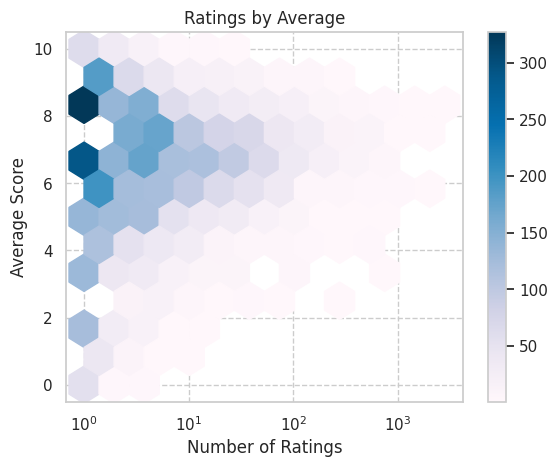

In [ ]:
df.plot(x='nRatings', 
        y='Score', 
        kind='hexbin',
        xscale='log', 
        cmap='PuBu', 
        gridsize=12, 
        mincnt=1,
        title="Ratings by Average")
plt.grid(linestyle='--')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Score')
plt.show()

The figure shows that the majority of the rums in this dataset are rated by less than 10 users. If there are less than 10 ratings, the probability is much higher that a rum will have an average rating of 9.0, whereas after 10 ratings, the figure shows that it is extremely unlikely to see a rum with an average rating less than 2 or greater than 8. The ratings by a simple average cannot reflect how the rums really are. 

We can calculate the bayesian average rating, which takes the number of ratings into account.

In [5]:
m = df['Score'].mean()
C = df['nRatings'].mean()
df['bAveScore'] = (df['Score'] * df['nRatings'] + C * m) / (df['nRatings'] + C)

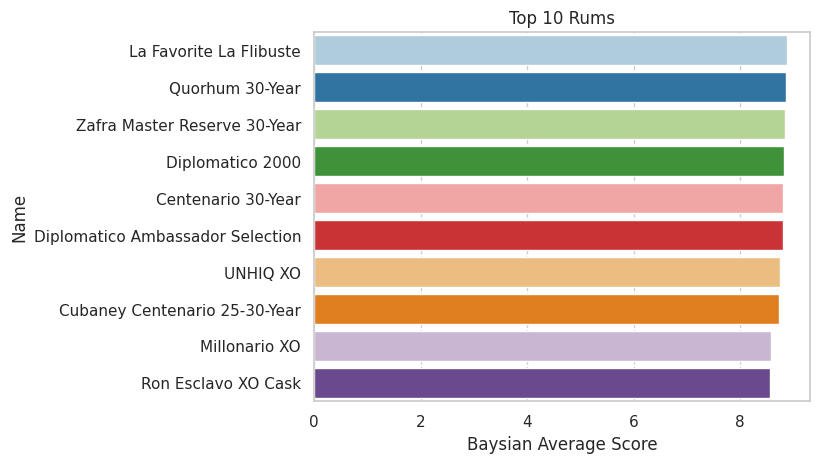

In [6]:
top = df.sort_values(by='bAveScore', ascending=False)
top['fullName'] = top['Company'] + ' ' + top['Name']
sns.barplot(y='fullName', x='bAveScore', data=top[:10])
plt.xlabel('Baysian Average Score')
plt.ylabel('Name')
plt.title('Top 10 Rums')
plt.show()

In [8]:
top[:10].Type

194    Agricole
53         Aged
212        Aged
144        Aged
111        Aged
75         Aged
138        Aged
184        Aged
52         Aged
149        Aged
Name: Type, dtype: object

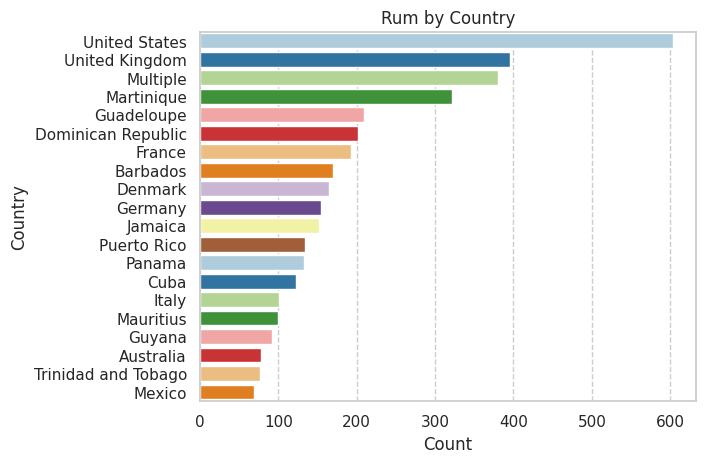

In [ ]:
loc = pd.value_counts(df.Location)[:20]
sns.barplot(x=loc.values, y=loc.index, palette='Paired')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Rum by Country')
plt.show()

<ipython-input-18-21d0007fdcf2>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(y='Location', x='bAveScore', data=df.loc[df.Location.isin(locRate.index)], palette='Paired')


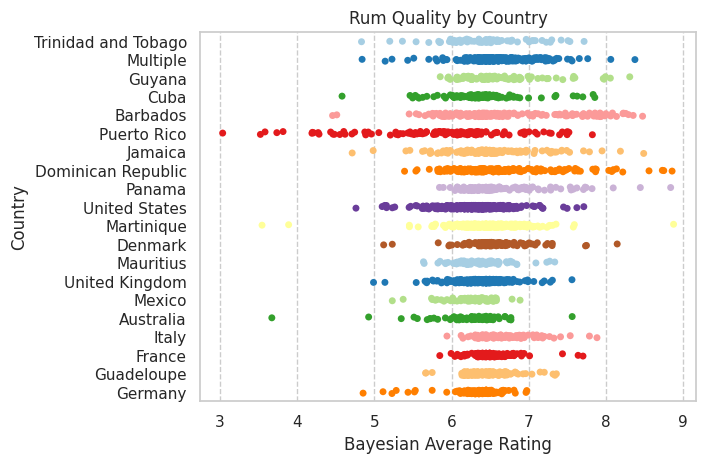

In [ ]:
locRate = pd.value_counts(df.Location)[:20]
sns.stripplot(y='Location', x='bAveScore', data=df.loc[df.Location.isin(locRate.index)], palette='Paired')
plt.ylabel('Country')
plt.xlabel('Bayesian Average Rating')
plt.title('Rum Quality by Country')
plt.show()

According to the plot, Dominican Republic, and Panama make good rums. Guyana, Barbados, Jamaica, and Puerto Rico make decent rums too.

The outlier in Martinique is quite interesting. This is probably because Martinique produces great agricole rum and it is the only AOC mark in the rum industry.

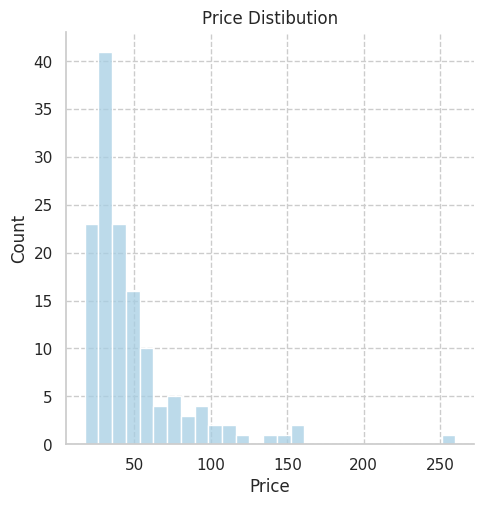

In [ ]:
sns.distplot(df.Price, kde=False)
plt.title('Price Distibution')
plt.show()

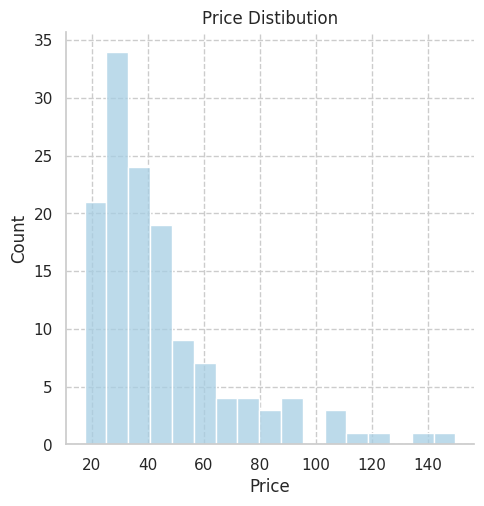

In [ ]:
# remobe outliers and plot again
threshold = df['Price'].quantile(0.99)
sns.displot(df[df['Price']<threshold].Price, kde=False)
plt.title('Price Distibution')
plt.show()

Most of the price falls between 20 to 40 dollars.

In [ ]:
df['ABV'] = df['ABV'].str.rstrip('%').astype('float')

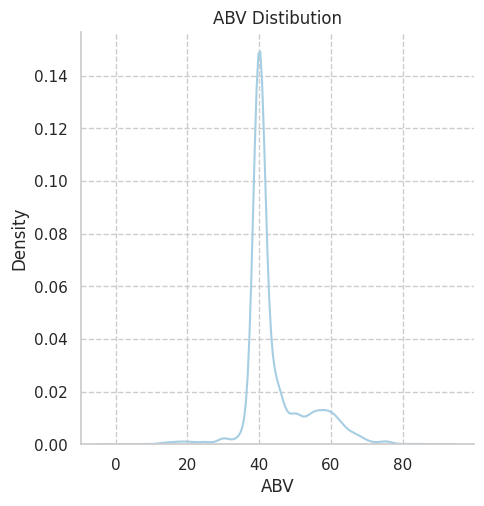

In [ ]:
sns.displot(df.ABV, kind="kde")
plt.title('ABV Distibution')
plt.show()

In [ ]:
Most rum has 40% ABV.

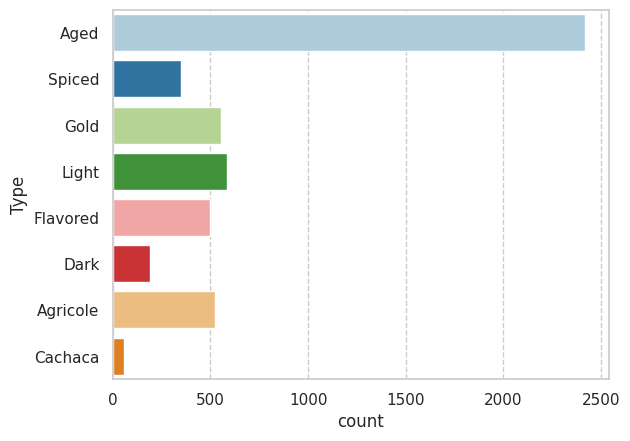

In [ ]:
sns.countplot(y='Type', data=df)
plt.show()

Aged rum is the most abundant type. This is because aged rum overlaps with other types. For example, gold rum is often aged for several years. Among all the other types, light rum is quite popular among rum producers. One possible reason is that light rum is the most popular and common for cocktails so its market is larger than the others.

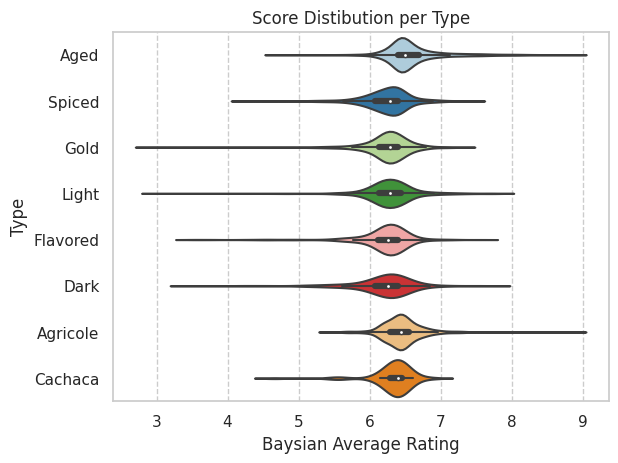

In [ ]:
sns.violinplot(y='Type', x='bAveScore', data=df)
plt.xlabel('Baysian Average Rating')
plt.title('Score Distibution per Type')
plt.show()

Among all the types, aged rum and agricole rum get the highest score. Aged rum gets a relatively higher score probably because most good rums are aged for years in barrels to get a superior flavor. As for agricole rum, it is fermented and distilled from pure, fresh cane juice, instead of molasses, which helps it retain more of the original flavor of the full cane juice. 

Light and gold rum get a lower score probably because they are often used in cocktail recipes so the score could be biased by other ingredients.

<ipython-input-11-b1c04c404db5>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(y='Company', x='bAveScore', data=topBrand, palette='Paired')


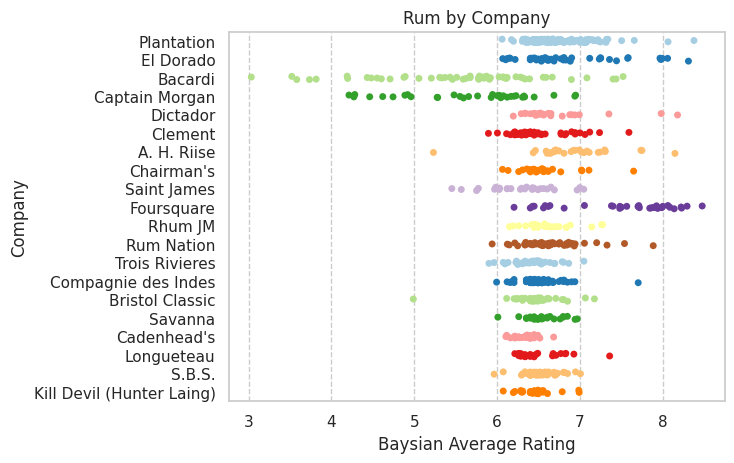

In [11]:
topBrand = pd.value_counts(df.Company)[:20]
topBrand = df.loc[df.Company.isin(topBrand.index)]
sns.stripplot(y='Company', x='bAveScore', data=topBrand, palette='Paired')
plt.xlabel('Baysian Average Rating')
plt.title('Rum by Company')
plt.show()

Among all the brands, Plantation, EI Dorado, and Foursquare maily focus on the high end and produces the best rum. Bacardi gets the lowest score probably because it makes many rums that are used for cocktails, which is not suitable to be neat or on rocks. However, it is clear shown in the figure that Bacardi is a full-range rum producer as it produces rums from entry-level to high-end.

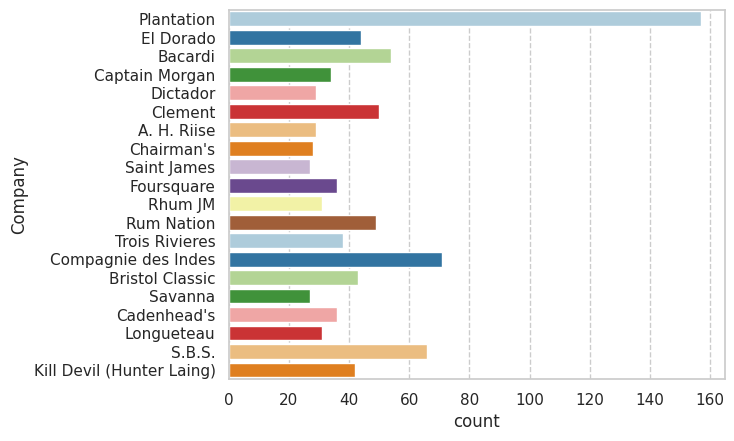

In [ ]:
sns.countplot(y='Company', data=topBrand, palette='Paired')
plt.show()

Plantation has the most rum product comparing to other brands.

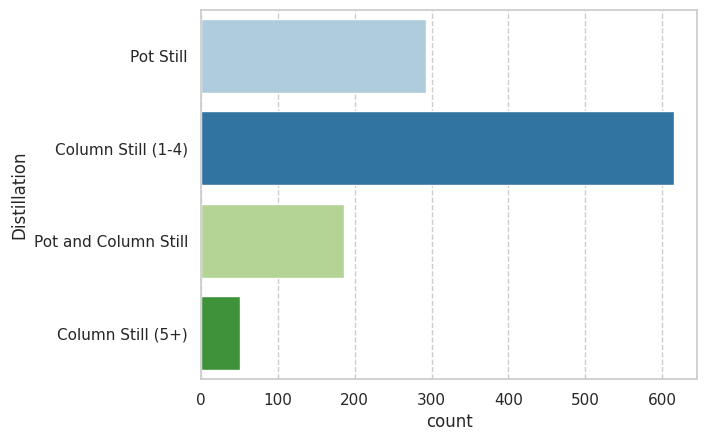

In [ ]:
sns.countplot(y='Distillation', data=df)
plt.show()

Most of the rum is distilled by less than 4 columns.

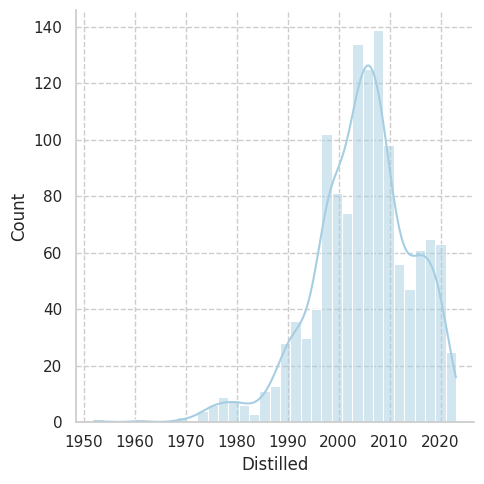

In [ ]:
sns.displot(x='Distilled', data=df, kde=True)
plt.show()

Most of the aged rum products are from 2004-2008.